In [1]:
from keras.applications import vgg16, mobilenet, resnet50
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [63]:
vgg = vgg16.VGG16(weights='imagenet')
mob = mobilenet.MobileNet(weights='imagenet')
res = resnet50.ResNet50(weights='imagenet')

Get a histogram of the weight values. To find out the range of the bins to use, we first get the cumulative distribution and look for a range that covers 99% of the weights. We do further adjustments to zoom in if there are less than 100 bins covering our plot.

In [126]:
def plot_percentile_histogram(model):
    weights = np.concatenate([w.flatten() for w  in model.get_weights()])
    abs_weights = np.abs(weights)
    print abs_weights.shape
    hist, bin_edges = np.histogram(abs_weights, bins=np.linspace(0,max(abs_weights), 10000))
    cum = np.cumsum(hist)
    cum = np.asfarray(cum) / np.max(cum)
    idx = np.argmax(cum > 0.99)
    max_val = bin_edges[idx+1]
    
    while idx < 100:
        print "readjusting"
        hist, bin_edges = np.histogram(abs_weights, bins=np.linspace(0,max_val, 10000))
        cum = np.cumsum(hist)
        cum = np.asfarray(cum) / np.max(cum)
        idx = np.argmax(cum > 0.99)
        max_val = bin_edges[idx+1]
        
    
    fig, axs = plt.subplots(2)
    axs[0].plot(cum)
    
    
    print idx, max_val
    axs[1].hist(weights, bins=np.linspace(-max_val, max_val, 100))
    return cum
#plot_percentile_histogram(vgg)

(138357544,)
readjusting
7787 0.0124894965346


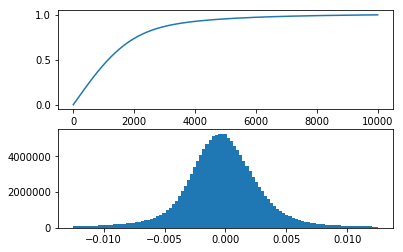

In [128]:
_ = plot_percentile_histogram(vgg)

(4253864,)
readjusting
3860 0.290723516098


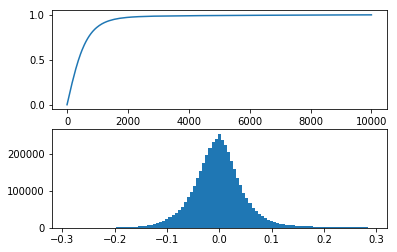

In [129]:
_ = plot_percentile_histogram(mob)

(25636712,)
readjusting
readjusting
7418 0.0490213843766


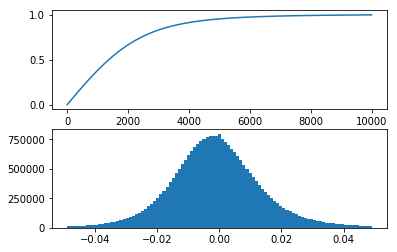

In [130]:
_ = cum_res = plot_percentile_histogram(res)

In [118]:
_

array([ 0.99999711,  0.99999743,  0.9999975 , ...,  0.99999996,
        0.99999996,  1.        ])